In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
#データ読み込み
df = pd.read_csv('../data/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
#欠損値の削除
df = df.dropna()
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
#欠損値有無の確認

is_null = df.isnull()
null_counts = is_null.sum()
null_counts

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [7]:
#Class毎に抽出する

df_Busi = df.query('Class == "Business"')
df_Eco = df.query('Class == "Eco"')
df_Plus = df.query(' Class == "Eco Plus"')

In [8]:
df_Plus.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
11,11,51412,Female,Loyal Customer,12,Personal Travel,Eco Plus,308,2,4,...,1,1,2,5,5,5,1,0,0.0,neutral or dissatisfied
27,27,14925,Female,Loyal Customer,49,Business travel,Eco Plus,315,4,4,...,4,4,4,4,2,4,2,0,8.0,satisfied
37,37,48014,Male,Loyal Customer,40,Personal Travel,Eco Plus,550,4,3,...,2,5,1,4,3,4,2,23,20.0,neutral or dissatisfied
69,69,9261,Female,Loyal Customer,38,Business travel,Eco Plus,157,4,4,...,4,3,3,1,1,4,4,0,0.0,satisfied


In [24]:
#satisfavtionを残したdf

df_Plus_with_satisfaction = df_Plus.drop(['id','Unnamed: 0','Class'], axis=1)

# One-hot encodingを実行する

df_Plus_enc_satisfaction = pd.get_dummies(df_Plus_with_satisfaction, dtype=int,drop_first=True)

In [33]:
df_Plus_enc_satisfaction.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,18.0,1,0,1,0
11,12,308,2,4,2,2,1,2,1,1,...,5,5,5,1,0,0.0,0,0,1,0
27,49,315,4,4,4,4,2,2,1,4,...,4,2,4,2,0,8.0,0,0,0,1
37,40,550,4,3,4,2,2,4,2,2,...,4,3,4,2,23,20.0,1,0,1,0
69,38,157,4,4,4,4,4,4,4,4,...,1,1,4,4,0,0.0,0,0,0,1


In [25]:
#id,unnamed,class,satisfaction 不要な列を消す

df_Busi_del = df_Busi.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)
df_Eco_del = df_Eco.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)
df_Plus_del = df_Plus.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)

In [26]:
# One-hot encodingを実行する

df_Busi_enc = pd.get_dummies(df_Busi_del, dtype=int,drop_first=True)
df_Eco_enc = pd.get_dummies(df_Eco_del, dtype=int,drop_first=True)
df_Plus_enc = pd.get_dummies(df_Plus_del, dtype=int,drop_first=True)

In [27]:
df_Plus_enc.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,13,460,3,4,3,1,5,3,5,5,...,3,4,4,5,5,25,18.0,1,0,1
11,12,308,2,4,2,2,1,2,1,1,...,2,5,5,5,1,0,0.0,0,0,1
27,49,315,4,4,4,4,2,2,1,4,...,4,4,2,4,2,0,8.0,0,0,0
37,40,550,4,3,4,2,2,4,2,2,...,1,4,3,4,2,23,20.0,1,0,1
69,38,157,4,4,4,4,4,4,4,4,...,3,1,1,4,4,0,0.0,0,0,0


In [28]:
#デンドロイドを行う

In [29]:
features = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Gender_Male','Customer Type_disloyal Customer','Type of Travel_Personal Travel']

In [30]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# データの準備
data_Plus_enc = df_Plus_enc[features].values
ss = StandardScaler()
Plus_enc_scaled_data = ss.fit_transform(data_Plus_enc)


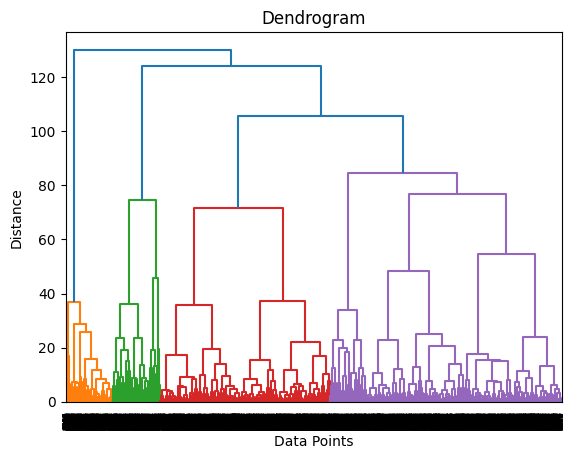

In [55]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
result = linkage(Plus_enc_scaled_data,  method='ward')
dendrogram(result)
#dendrogram(result,truncate_mode='lastp',p=4)


plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


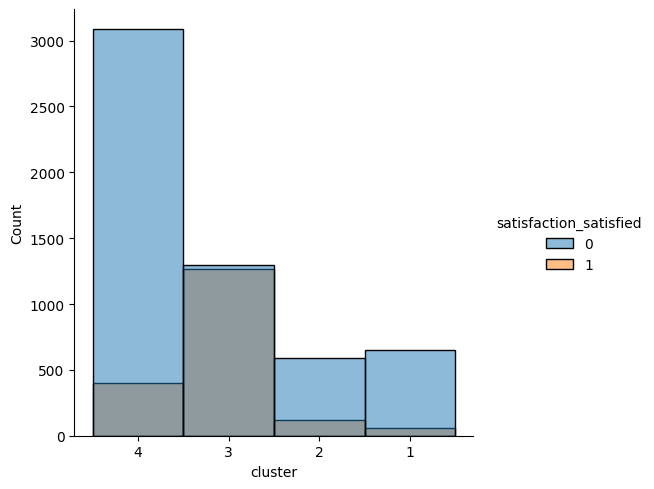

In [40]:
import seaborn as sns

#fcluster関数は、クラスタリング結果からクラスタラベルを取得するために使用
cluster = fcluster(result, t=100, criterion='distance')#distaceが35を超えると異なるクラスタとみなす、という意味

#元のデータフレームにクラスタリング結果を結合
new_df = df_Plus_enc_satisfaction.assign(cluster = cluster)

#cluster列を文字列に変換
new_df['cluster'] = new_df['cluster'].astype('str')

#可視化
sns.displot(new_df, x='cluster', hue='satisfaction_satisfied', kind='hist')
plt.show()

In [54]:
new_df.query('cluster == "4"')

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,cluster
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,1,0,1,0,4
11,12,308,2,4,2,2,1,2,1,1,...,5,5,1,0,0.0,0,0,1,0,4
37,40,550,4,3,4,2,2,4,2,2,...,3,4,2,23,20.0,1,0,1,0,4
73,66,516,1,4,1,2,2,1,2,2,...,5,5,2,0,37.0,1,0,1,0,4
86,57,500,3,5,3,2,3,4,5,5,...,4,5,5,0,0.0,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103791,23,1208,1,5,1,3,2,1,2,2,...,2,3,2,11,16.0,0,0,1,0,4
103801,58,594,2,4,1,4,4,1,5,4,...,5,3,4,0,0.0,1,0,1,0,4
103804,46,369,2,5,2,4,3,2,3,3,...,5,4,3,0,0.0,1,0,1,0,4
103867,30,1416,3,2,2,2,3,3,3,3,...,2,3,3,0,24.0,1,0,0,0,4


In [35]:
new_df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,cluster
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,1,0,1,0,8
11,12,308,2,4,2,2,1,2,1,1,...,5,5,1,0,0.0,0,0,1,0,10
27,49,315,4,4,4,4,2,2,1,4,...,2,4,2,0,8.0,0,0,0,1,5
37,40,550,4,3,4,2,2,4,2,2,...,3,4,2,23,20.0,1,0,1,0,9
69,38,157,4,4,4,4,4,4,4,4,...,1,4,4,0,0.0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103811,27,641,4,4,4,4,4,4,4,4,...,3,4,4,38,40.0,1,0,0,0,6
103867,30,1416,3,2,2,2,3,3,3,3,...,2,3,3,0,24.0,1,0,0,0,7
103868,57,1105,1,5,1,5,4,3,3,5,...,1,5,1,0,1.0,0,0,1,0,11
103877,27,162,5,4,4,4,5,5,5,5,...,2,3,5,0,0.0,1,0,0,1,6
